# Data Collection

Dataset : Boston Housing Dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv("data.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


 CRIM - per capita crime rate by town

 ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

 INDUS - proportion of non-retail business acres per town

 CHAS- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

 NOX - nitric oxides concentration (parts per 10 million)

 RM - average number of rooms per dwelling

 AGE - proportion of owner-occupied units built prior to 1940

 DIS - weighted distances to five Boston employment centres

 RAD - index of accessibility to radial highways

 TAX - full value property-tax rate per $10,000

 PTRATIO - pupil teacher ratio by town

 B- 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

 LSTAT - % lower status of the population

 MEDV - Median value of owner-occupied homes in $1000's

# Data Cleaning and Preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [7]:
df.shape 

(511, 14)

The sample size is 511, with 3 integer values and rest float values



 Count missing values per column :

In [10]:
df.isnull().sum()  

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

as the data is normal we will fill it with mean values

 Use .mean() if the column is normally distributed.
 
 Use .median() if it’s skewed.
 
 Use .mode() if it’s categorical.
 
 don't use inplace as it will not let you categorize 

In [12]:
df['RM']= df['RM'].fillna(df['RM'].mean())

In [13]:
df['RM'].isnull().sum()

0

now the dataframe has no missing values

In [15]:
df.duplicated().sum() 

0

There is no duplicated values

In [17]:
df['MEDV'].describe()

count    511.000000
mean      22.682192
std        9.484262
min        5.000000
25%       17.050000
50%       21.200000
75%       25.000000
max       67.000000
Name: MEDV, dtype: float64

# EXPLORATORY DATA ANALYSIS

# Univariate Analysis

Target Variable is Median Value of Prices

<Axes: xlabel='MEDV', ylabel='Count'>

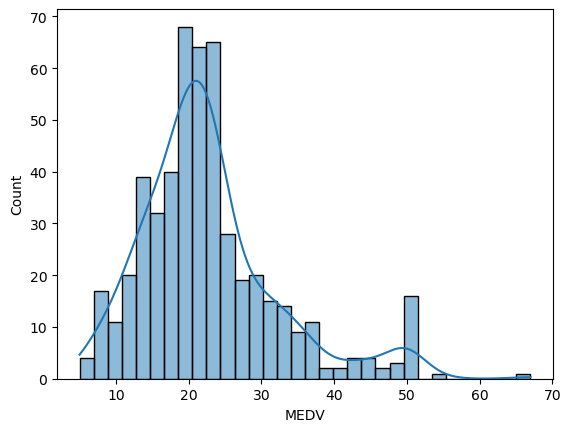

In [21]:
import seaborn as sns
sns.histplot(df['MEDV'], kde=True)


The most common median value price lies around 20 with a count of more than 60

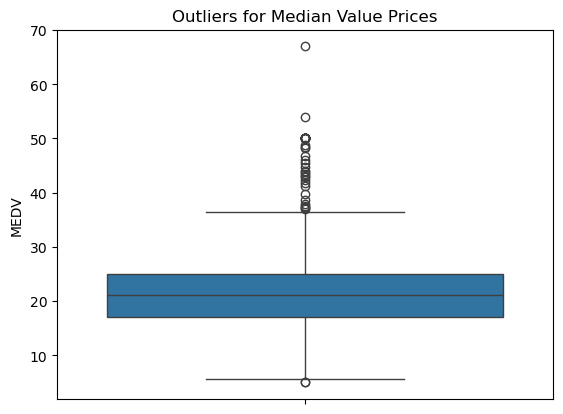

In [23]:
sns.boxplot(df['MEDV'])
plt.title("Outliers for Median Value Prices")
plt.show()

A very few of the values lie in the outlier region, much of them between 40-50 which is also confirmed in the countplot because of a sudden rise

The outliers indicate that the median value prices for prime locations is around 40-50(1000$)


VARIABLE 1 - RM

What are the most common property types (e.g., condo, townhouse, detached)?

For the same we will categorize rm and plot countplot


In [26]:
df['RM'].describe()


count    511.000000
mean       6.287589
std        0.700343
min        3.561000
25%        5.887500
50%        6.211000
75%        6.627000
max        8.780000
Name: RM, dtype: float64

<Axes: xlabel='RM', ylabel='Count'>

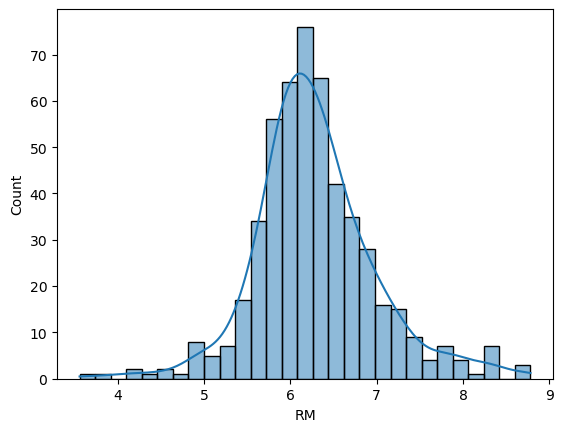

In [27]:
sns.histplot(df['RM'], kde=True)

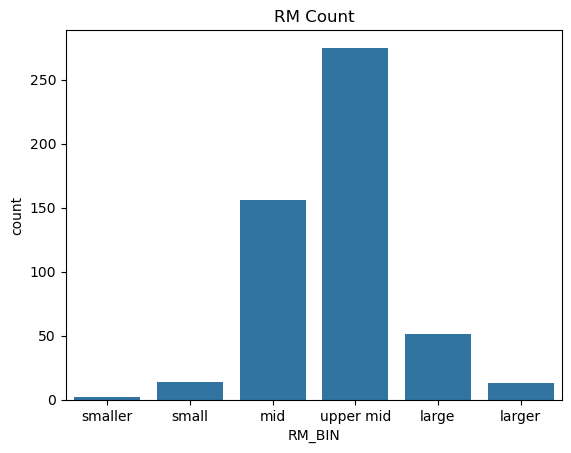

In [28]:
import seaborn as sns
df['RM_BIN']=pd.cut(df['RM'], bins=[3,4,5,6,7,8,9], labels=['smaller','small','mid','upper mid','large','larger'])
sns.countplot(x='RM_BIN', data=df)
plt.title("RM Count")
plt.show()


the most common property size is upper mid 

i.e rooms per dwelling b/w 6-7

VARIABLE 2 - AGE

AGE - proportion of owner-occupied units built prior to 1940

In [31]:
df['AGE'].describe()

count    511.000000
mean      68.616243
std       28.099130
min        2.900000
25%       45.050000
50%       77.300000
75%       94.050000
max      100.000000
Name: AGE, dtype: float64

<Axes: xlabel='AGE', ylabel='Count'>

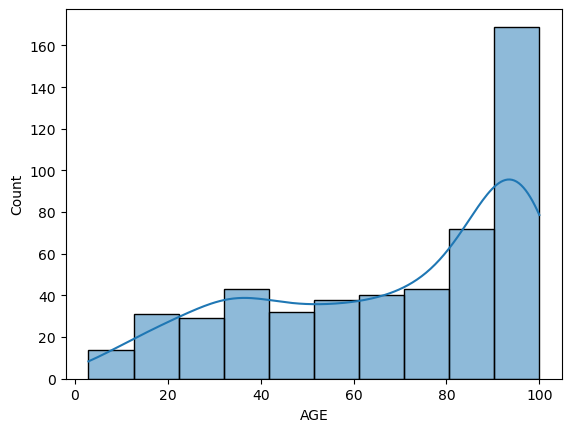

In [32]:
sns.histplot(df['AGE'], kde=True)

The areas mostly have old houses as the proportion of houses occupied by owner prior to 1940s is maximum at the highest value that is 100

VARIABLE 3 - CRIM

CRIM - per capita crime rate by town

In [35]:
df['CRIM'].describe()

count    511.000000
mean       3.584139
std        8.564433
min        0.006320
25%        0.082325
50%        0.261690
75%        3.621175
max       88.976200
Name: CRIM, dtype: float64

<Axes: xlabel='CRIM', ylabel='Count'>

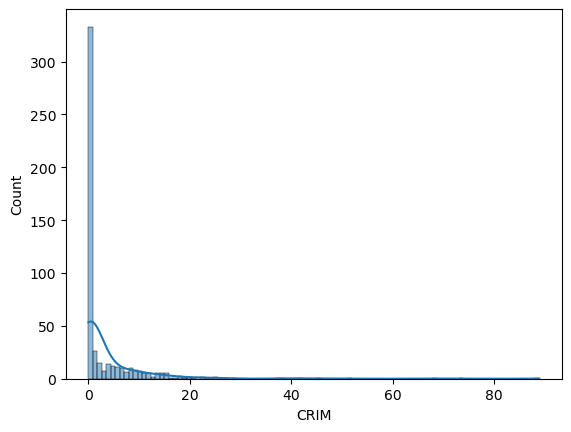

In [36]:
sns.histplot(df['CRIM'], kde=True)

The crime rate per capita is very low in these areas with almost 350 entries with 0 crime rate as the graph is excessively right skewed

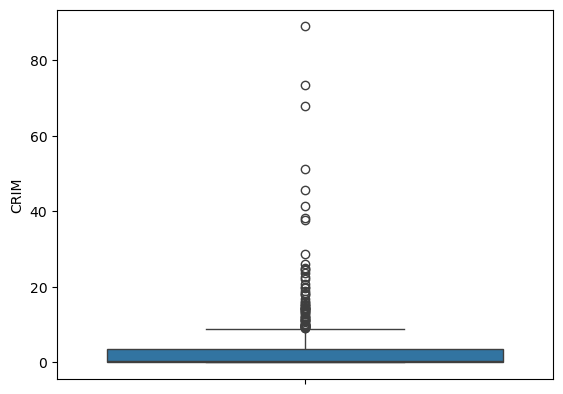

In [38]:
sns.boxplot(df['CRIM'])
plt.title("")
plt.show()

The boxplot confirms the previous conclusion while also adding that a very few areas do reach with a crime rate of 80 per capita

Variable 4 - CHAS 

CHAS- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

In [41]:
print("\nValue counts for Chas River:")
print(df['CHAS'].value_counts())



Value counts for Chas River:
CHAS
0    476
1     35
Name: count, dtype: int64


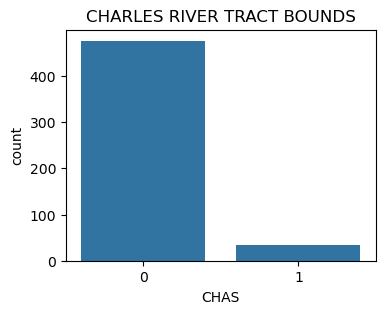

In [42]:
# Bar plot
plt.figure(figsize=(4,3))
sns.countplot(x='CHAS', data=df)
plt.title("CHARLES RIVER TRACT BOUNDS")
plt.show()

Almost 90% of the areas don't tract bounds with Charles river, does this affect the prices??

Let's find out using Bivariate Analysis

# Bivariate Analysis - find relationships between features and house prices

In [45]:
df['CHAS'].corr(df['MEDV'])

0.16478191548631307

In [46]:
df['LSTAT'].corr(df['MEDV'])

-0.5629602938173786

In [47]:
df['PTRATIO'].corr(df['MEDV'])

-0.4474640140421771

In [48]:
df['CRIM'].corr(df['MEDV'])

-0.38007199249316004

In [49]:
df['RM'].corr(df['MEDV'])

0.6669538165333394

Interpretation

RM (average number of rooms) has the strongest positive correlation with house prices.

LSTAT (% lower status population) has the strongest negative correlation with house prices.

CHAS (Charles River dummy variable) shows only a weak positive correlation.

PTRATIO (pupil-teacher ratio) and CRIM (crime rate) both have moderate negative correlations with house prices.

 ## Visualization

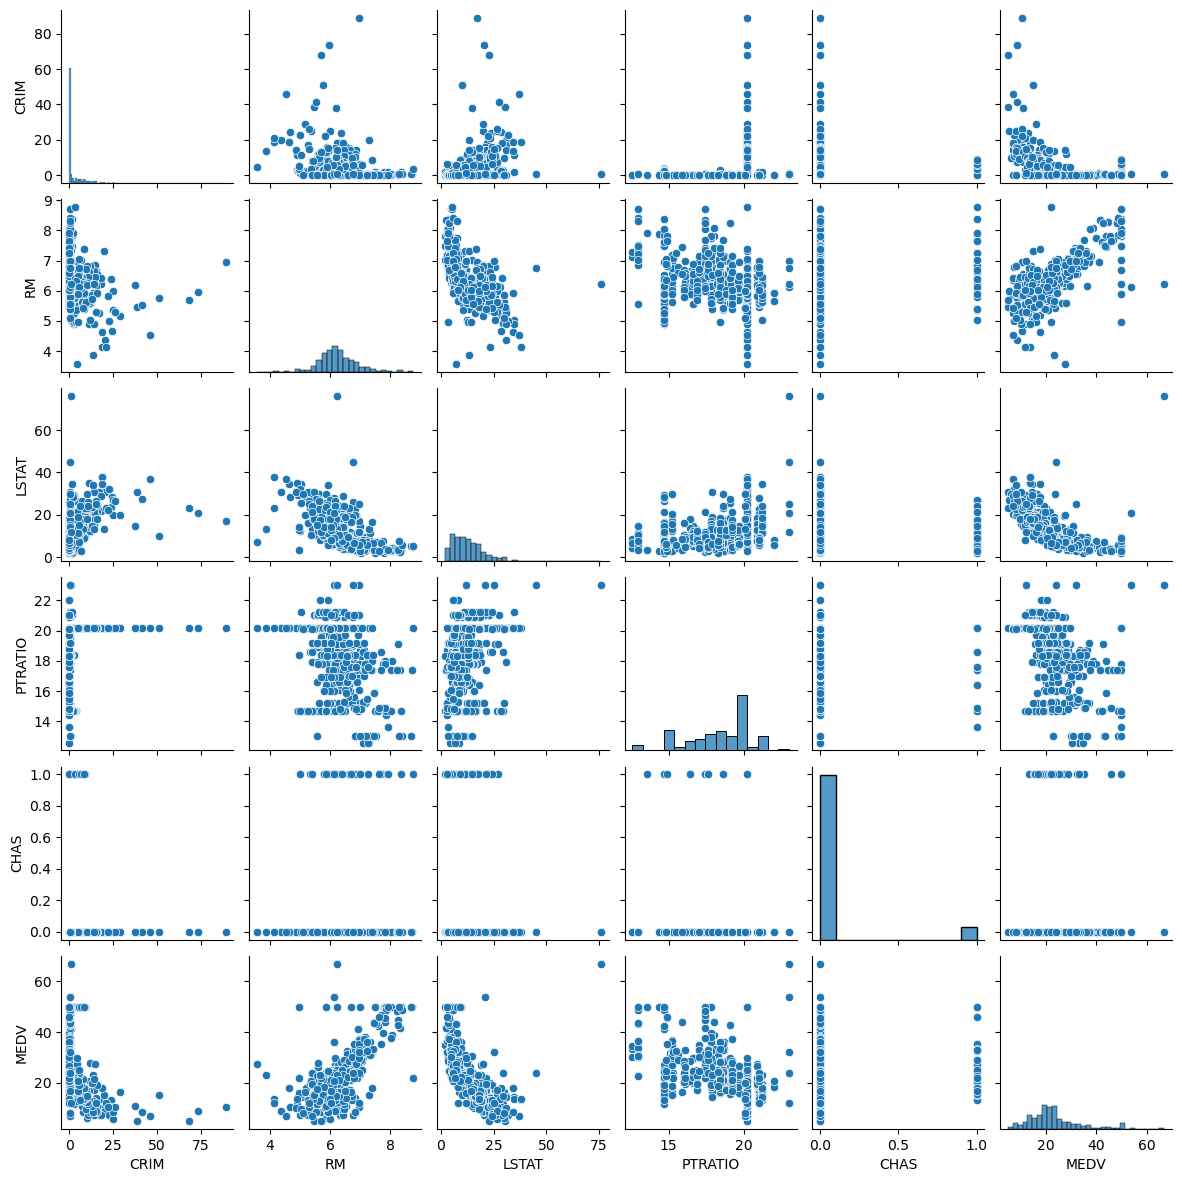

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and you want only specific columns for the pairplot
plot = df[['CRIM', 'RM', 'LSTAT', 'PTRATIO', 'CHAS', 'MEDV']]

# Create a pairplot
sns.pairplot(plot, height= 2)

# Display the plot
plt.show()


Interpretations are visible through the visualizations

In [54]:
df['TAX'].corr(df['MEDV'])


-0.4592740249982133

In [55]:
df['MEDV'].corr(df['INDUS'])

-0.4632690556007902

In [56]:
df['MEDV'].corr(df['NOX'])

-0.4114858874857162

In [57]:
df['MEDV'].corr(df['DIS'])

0.2334693151942143

In [58]:
df['MEDV'].corr(df['AGE'])

-0.3682034493513787

Interpretations

## Visualization

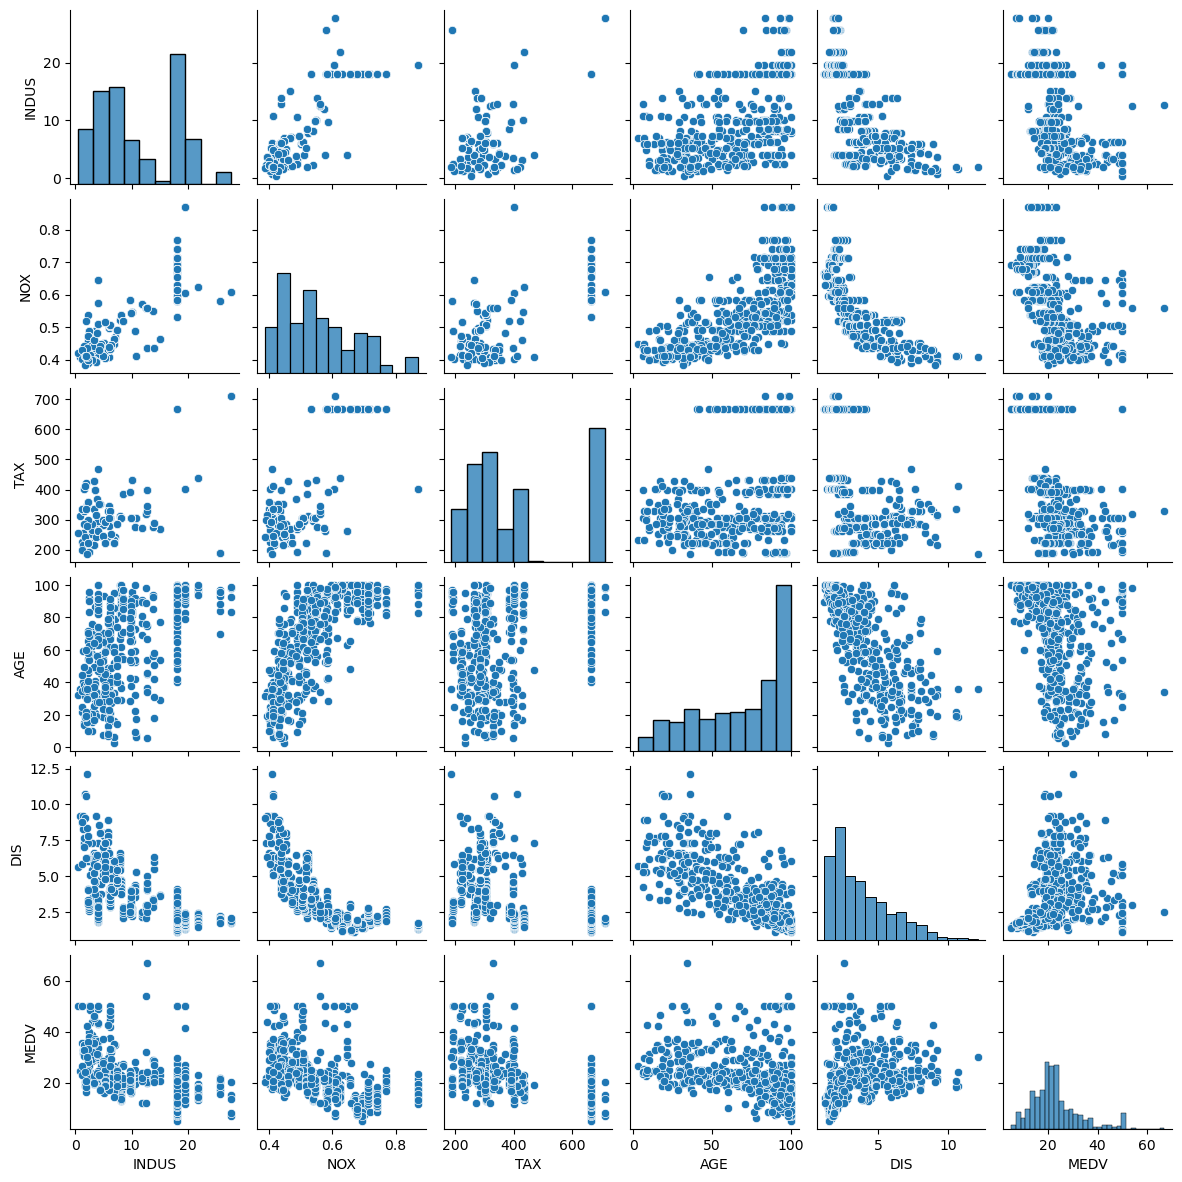

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and you want only specific columns for the pairplot
plot = df[['INDUS', 'NOX', 'TAX', 'AGE', 'DIS', 'MEDV']]

# Create a pairplot
sns.pairplot(plot, height= 2)

# Display the plot
plt.show()

Interpretations are visible through the visualizations

## Correlation Heatmap

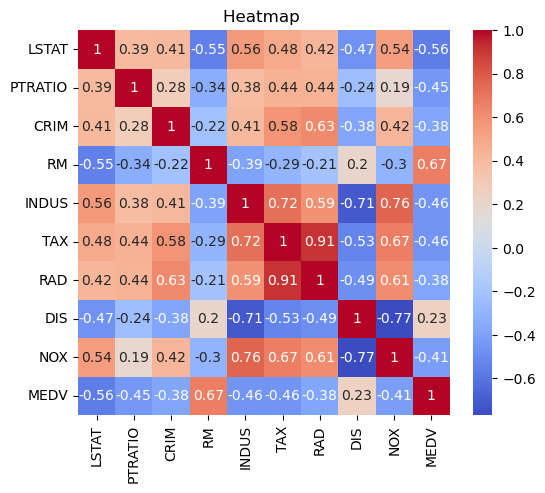

In [64]:
selected_vars=['LSTAT','PTRATIO','CRIM','RM','INDUS','TAX','RAD','DIS','NOX','MEDV']
corr_matrix=df[selected_vars].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap ")
plt.show()

In [65]:
# LSTAT, PTRATIO, INDUS, TAX HAVE STRONG NEGATIVE CORRELATION with MEDV
# WHEREAS RM HAS STRONG POSITIVE RELATION WITH MEDV
# TAX AND RAD HAVE STRONG POSITIVE CORRELATION
# DIS(CLOSENESS TO EMPLOYMENT CENTRES) HAS STRONG NEGATIVE CORRELATION WITH INDUS(PROP OF NON RETAIL BUSINESS), NOX(NITRIC OXIDE CONCENTRATION) AND AGE( proportion of owner-occupied units built prior to 1940)
# INDUS HAS STRONG POSITIVE CORRELATION WITH TAX AND NOX
# NOX AND AGE HAS STRONG POSITIVE CORRELATION

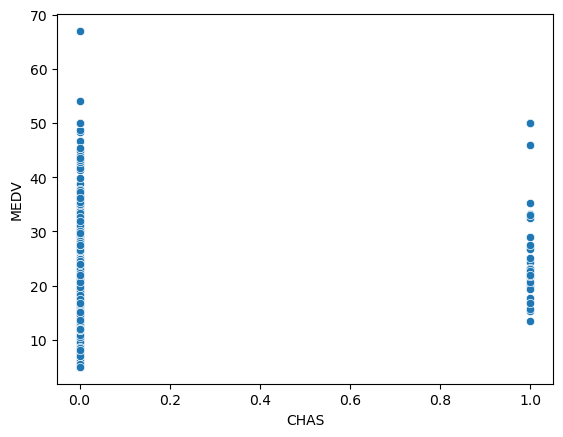

In [66]:
sns.scatterplot(data=df, y='MEDV', x='CHAS')
plt.show()

VERY FEW PROPORTION OF HOUSES ARE CLOSE TO CHARLES RIVER FOR WHICH THE PRICES FALL WITHIN AVERAGE MEDIAN PRICES

# Statistical Analysis

## Hypothesis Testing

## Parametric Tests

In [73]:
import numpy as np
from math import sqrt
from scipy.stats import norm

# Two-sample z-test function
def two_sample_ztest(x1, x2):
    mean1, mean2 = np.mean(x1), np.mean(x2)
    std1, std2 = np.std(x1, ddof=1), np.std(x2, ddof=1)
    n1, n2 = len(x1), len(x2)

    se = sqrt((std1**2)/n1 + (std2**2)/n2)   # Standard error
    z = (mean1 - mean2) / se                 # Z-statistic
    p = 2 * (1 - norm.cdf(abs(z)))           # Two-tailed p-value
    return z, p


### Rooms vs Price

H₀: Mean MEDV of houses with ≤ 6 rooms = mean MEDV of houses with > 6 rooms.

H₁: Houses with more rooms have higher MEDV.

In [77]:
low_rm = df[df['RM'] <= 6]['MEDV']
high_rm = df[df['RM'] > 6]['MEDV']

z, p = two_sample_ztest(low_rm, high_rm)
print("Rooms vs Price: Z =", z, "p =", p)


Rooms vs Price: Z = -11.216883826368425 p = 0.0


**Interpretation :**

Since p is very small we reject the null Hypotheses 

Conclusion: Houses with more rooms have significantly higher prices.


### Crime rate vs price

H₀: Mean MEDV is the same in high-crime (CRIM above median) and low-crime areas.

H₁: High-crime areas have lower MEDV.

In [84]:
crime_median = df['CRIM'].median()
low_crime = df[df['CRIM'] <= crime_median]['MEDV']
high_crime = df[df['CRIM'] > crime_median]['MEDV']

z, p = two_sample_ztest(low_crime, high_crime)
print("Crime vs Price: Z =", z, "p =", p)


Crime vs Price: Z = 5.493686300762092 p = 3.936294401540863e-08


**Interpretation :**

Since p is very small we reject the null Hypotheses

Conclusion: Houses in high-crime areas have significantly lower prices..


### PTRATIO vs Price

H₀: Mean MEDV is equal in areas with high vs low PTRATIO (split at median).

H₁: Areas with lower PTRATIO have higher MEDV.

In [88]:
ptr_median = df['PTRATIO'].median()
low_ptr = df[df['PTRATIO'] <= ptr_median]['MEDV']
high_ptr = df[df['PTRATIO'] > ptr_median]['MEDV']

z, p = two_sample_ztest(low_ptr, high_ptr)
print("PTRATIO vs Price: Z =", z, "p =", p)


PTRATIO vs Price: Z = 11.374015475487028 p = 0.0


**Interpretation :**

Since p is very small we reject the null Hypotheses

Conclusion: Areas with lower pupil-teacher ratios (better schools) have significantly higher house prices

### River Proximity (CHAS) vs Price

H₀: Mean MEDV is the same for houses near the river (CHAS=1) and away from it (CHAS=0).

H₁: River houses have higher MEDV.

In [101]:
from scipy.stats import ttest_ind

river = df[df['CHAS'] == 1]['MEDV']
not_river = df[df['CHAS'] == 0]['MEDV']

t_stat, p_val = ttest_ind(river, not_river, equal_var=False)

print("T-statistic:", round(t_stat, 3))
print("p-value:", round(p_val, 5))

T-statistic: 3.028
p-value: 0.00446


**Interpretation :**

Since p is very small we reject the null Hypotheses

Conclusion: Houses near the river are priced significantly higher than houses away from it

### Age vs Price

H₀: Mean MEDV for older homes (AGE > 50%) = mean MEDV for newer homes (AGE ≤ 50%).

H₁: Older homes have lower MEDV

In [97]:
old_homes = df[df['AGE'] > 50]['MEDV']
new_homes = df[df['AGE'] <= 50]['MEDV']

z, p = two_sample_ztest(old_homes, new_homes)
print("Age vs Price: Z =", z, "p =", p)


Age vs Price: Z = -7.304781446489142 p = 2.7777780076121417e-13


**Interpretation :**

Since p is very small we reject the null Hypotheses

Conclusion: Older homes tend to have significantly lower prices than newer ones.

**Lets check using non parametric tests if there is a change in the results as the data was not normal**

## Non parametric Tests

***We use non-parametric tests when the data is not normal , in which kruskal wallis , man whitney tests act as an alternative for anova and t-tests respectively***

### 1. Mann–Whitney U test (2 groups, like CHAS)

H₀: Distribution of prices is the same in both groups.

H₁: Distribution of prices is different.

In [118]:
from scipy.stats import mannwhitneyu

# River vs Non-River
river = df[df['CHAS'] == 1]['MEDV']
not_river = df[df['CHAS'] == 0]['MEDV']

u_stat, p_val = mannwhitneyu(river, not_river, alternative='two-sided')
print("Mann-Whitney U:", u_stat, "p-value:", p_val)


Mann-Whitney U: 10942.5 p-value: 0.001947106936540413


### 2. Kruskal–Wallis test ( For RM vs Price )

H₀: All groups have the same distribution of prices.

H₁: At least one group differs.

In [122]:
from scipy.stats import kruskal

# Split RM into 3 categories
low_rm = df[df['RM'] <= 5]['MEDV']
mid_rm = df[(df['RM'] > 5) & (df['RM'] <= 7)]['MEDV']
high_rm = df[df['RM'] > 7]['MEDV']

h_stat, p_val = kruskal(low_rm, mid_rm, high_rm)
print("Kruskal-Wallis H:", h_stat, "p-value:", p_val)


Kruskal-Wallis H: 137.47860327145247 p-value: 1.402492700960779e-30
